In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [3]:
dataSetPath = r"..\1_DataSets\7_CardiacPrediction.xlsx"

dataset = pd.read_excel(dataSetPath)
dataSetName = os.path.basename(dataSetPath)


 
print(f"{dataSetName} Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"{dataSetName} Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")

7_CardiacPrediction.xlsx Columns: ['SEQN', 'Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin', 'Platelet-count', 'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width', 'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin', 'Vigorous-work', 'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease']
****************************
7_CardiacPrediction.xlsx Shape: (37079, 44)
****************************
Total Rows in dataset File: 37079


In [4]:
dataset.head()

,SEQN,Gender,Age,X60-sec-pulse,Systolic,Diastolic,Weight,Height,Body-Mass-Index,White-Blood-Cells,...,Triglycerides,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,68,98,56,75.4,174.0,24.90,7.6,...,1.298,5.56,1.39,4.7,3,3,2,2,2,0
1,5,1,49,66,122,83,92.5,178.3,29.10,5.9,...,3.850,7.21,1.08,5.5,1,1,2,2,2,0
2,12,1,37,64,174,99,99.2,180.0,30.62,10.2,...,1.581,4.03,0.98,5.2,2,1,2,1,1,0
3,13,1,70,102,130,66,63.6,157.7,25.57,11.6,...,3.635,8.12,1.28,7.6,3,3,1,1,2,0
4,14,1,81,72,136,61,75.5,166.2,27.33,9.1,...,0.756,4.50,1.04,5.8,1,1,2,2,2,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         37079 non-null  int64  
 1   Gender                       37079 non-null  int64  
 2   Age                          37079 non-null  int64  
 3   X60-sec-pulse                37079 non-null  int64  
 4   Systolic                     37079 non-null  int64  
 5   Diastolic                    37079 non-null  int64  
 6   Weight                       37079 non-null  float64
 7   Height                       37079 non-null  float64
 8   Body-Mass-Index              37079 non-null  float64
 9   White-Blood-Cells            37079 non-null  float64
 10  Lymphocyte                   37079 non-null  float64
 11  Monocyte                     37079 non-null  float64
 12  Eosinophils                  37079 non-null  float64
 13  Basophils       

In [6]:
dataset.describe()

,SEQN,Gender,Age,X60-sec-pulse,Systolic,Diastolic,Weight,Height,Body-Mass-Index,White-Blood-Cells,...,Triglycerides,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,...,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,48901.041236,1.513282,48.943661,72.579250,124.090078,69.919253,80.988276,167.389601,28.824588,7.269524,...,1.695405,5.081713,1.370344,5.676496,1.783840,1.598856,1.907333,1.549502,1.796165,0.040670
std,26753.636441,0.499830,18.010440,12.242108,19.254741,13.575804,20.678734,10.122908,6.608982,2.478754,...,1.283654,1.072682,0.415985,1.050223,0.448324,0.511199,0.349674,0.497550,0.402853,0.197527
min,2.000000,1.000000,20.000000,32.000000,0.000000,0.000000,32.300000,129.700000,13.180000,1.400000,...,0.102000,1.530000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,26120.500000,1.000000,33.000000,64.000000,111.000000,62.000000,66.500000,160.000000,24.220000,5.700000,...,0.903000,4.320000,1.070000,5.200000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,50065.000000,2.000000,48.000000,72.000000,121.000000,70.000000,78.200000,167.100000,27.800000,6.900000,...,1.344000,5.020000,1.290000,5.400000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,71173.500000,2.000000,63.000000,80.000000,134.000000,78.000000,92.100000,174.600000,32.100000,8.400000,...,2.066000,5.740000,1.600000,5.800000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,93702.000000,2.000000,85.000000,224.000000,270.000000,132.000000,371.000000,204.500000,130.210000,117.200000,...,34.559000,14.090000,5.840000,18.800000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000


# Pre-Processing (Removing Nan and  Duplicates)

In [7]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")


Dataset Shape after removing duplcates: (37079, 44)
****************************
Remaining Rows in Dataset: 37079
****************************
Total Duplicates: 0
Remaining Rows in Dataset: 37079
****************************
Removed Number of rows containing Null Values: 0


# Class Distribution check (imbalanced or balanced)

Target Class Distribution:
CoronaryHeartDisease
0    35571
1     1508
Name: count, dtype: int64


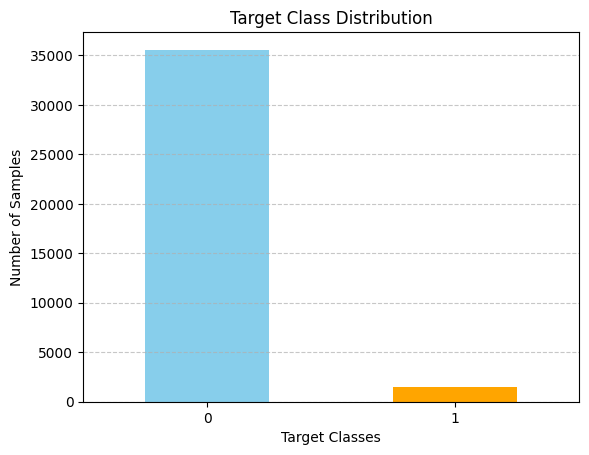

In [8]:
# Target Classes Distribution 
target_column = cleanedDataset.columns.to_list()[-1]

# Check the distribution of each target class
class_distribution = cleanedDataset[target_column].value_counts()

# Print the class distribution
print("Target Class Distribution:")
print(class_distribution)
  
# Bar plot of class distribution
class_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Label Encoding (Changing Categorical to Numerical)

In [9]:
labelEncodingAlgorithmFromScienceKit = LabelEncoder()

for col in cleanedDataset.select_dtypes(include=['object', 'category', 'bool', 'datetime']).columns:
    cleanedDataset[col] = cleanedDataset[col].str.lower()
    cleanedDataset[col] = cleanedDataset[col].str.strip()
    cleanedDataset[col] = labelEncodingAlgorithmFromScienceKit.fit_transform(cleanedDataset[col])
 

cleanedDataset.shape

cleanedDataset.head()


,SEQN,Gender,Age,X60-sec-pulse,Systolic,Diastolic,Weight,Height,Body-Mass-Index,White-Blood-Cells,...,Triglycerides,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,68,98,56,75.4,174.0,24.90,7.6,...,1.298,5.56,1.39,4.7,3,3,2,2,2,0
1,5,1,49,66,122,83,92.5,178.3,29.10,5.9,...,3.850,7.21,1.08,5.5,1,1,2,2,2,0
2,12,1,37,64,174,99,99.2,180.0,30.62,10.2,...,1.581,4.03,0.98,5.2,2,1,2,1,1,0
3,13,1,70,102,130,66,63.6,157.7,25.57,11.6,...,3.635,8.12,1.28,7.6,3,3,1,1,2,0
4,14,1,81,72,136,61,75.5,166.2,27.33,9.1,...,0.756,4.50,1.04,5.8,1,1,2,2,2,0


# Correlation Matrix (Pearson, Spearman-Rank)

In [10]:
# Calculate Pearson correlation
pearson_corr = cleanedDataset.corr(method='pearson')

# Calculate Spearman correlation
spearman_corr = cleanedDataset.corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)


Pearson Correlation:
                                  SEQN    Gender       Age  X60-sec-pulse  \
SEQN                         1.000000 -0.001776  0.001023       0.011624   
Gender                      -0.001776  1.000000 -0.031112       0.154636   
Age                          0.001023 -0.031112  1.000000      -0.149767   
X60-sec-pulse                0.011624  0.154636 -0.149767       1.000000   
Systolic                    -0.034467 -0.087586  0.470331      -0.067331   
Diastolic                   -0.030211 -0.116799 -0.042284       0.070437   
Weight                       0.045199 -0.266853 -0.035815       0.081700   
Height                      -0.019020 -0.671155 -0.136000      -0.069522   
Body-Mass-Index              0.059610  0.059787  0.029349       0.125678   
White-Blood-Cells           -0.006061  0.041347 -0.073692       0.206151   
Lymphocyte                   0.050807  0.043523 -0.097218      -0.127914   
Monocyte                     0.006424 -0.198896  0.153205      -0.

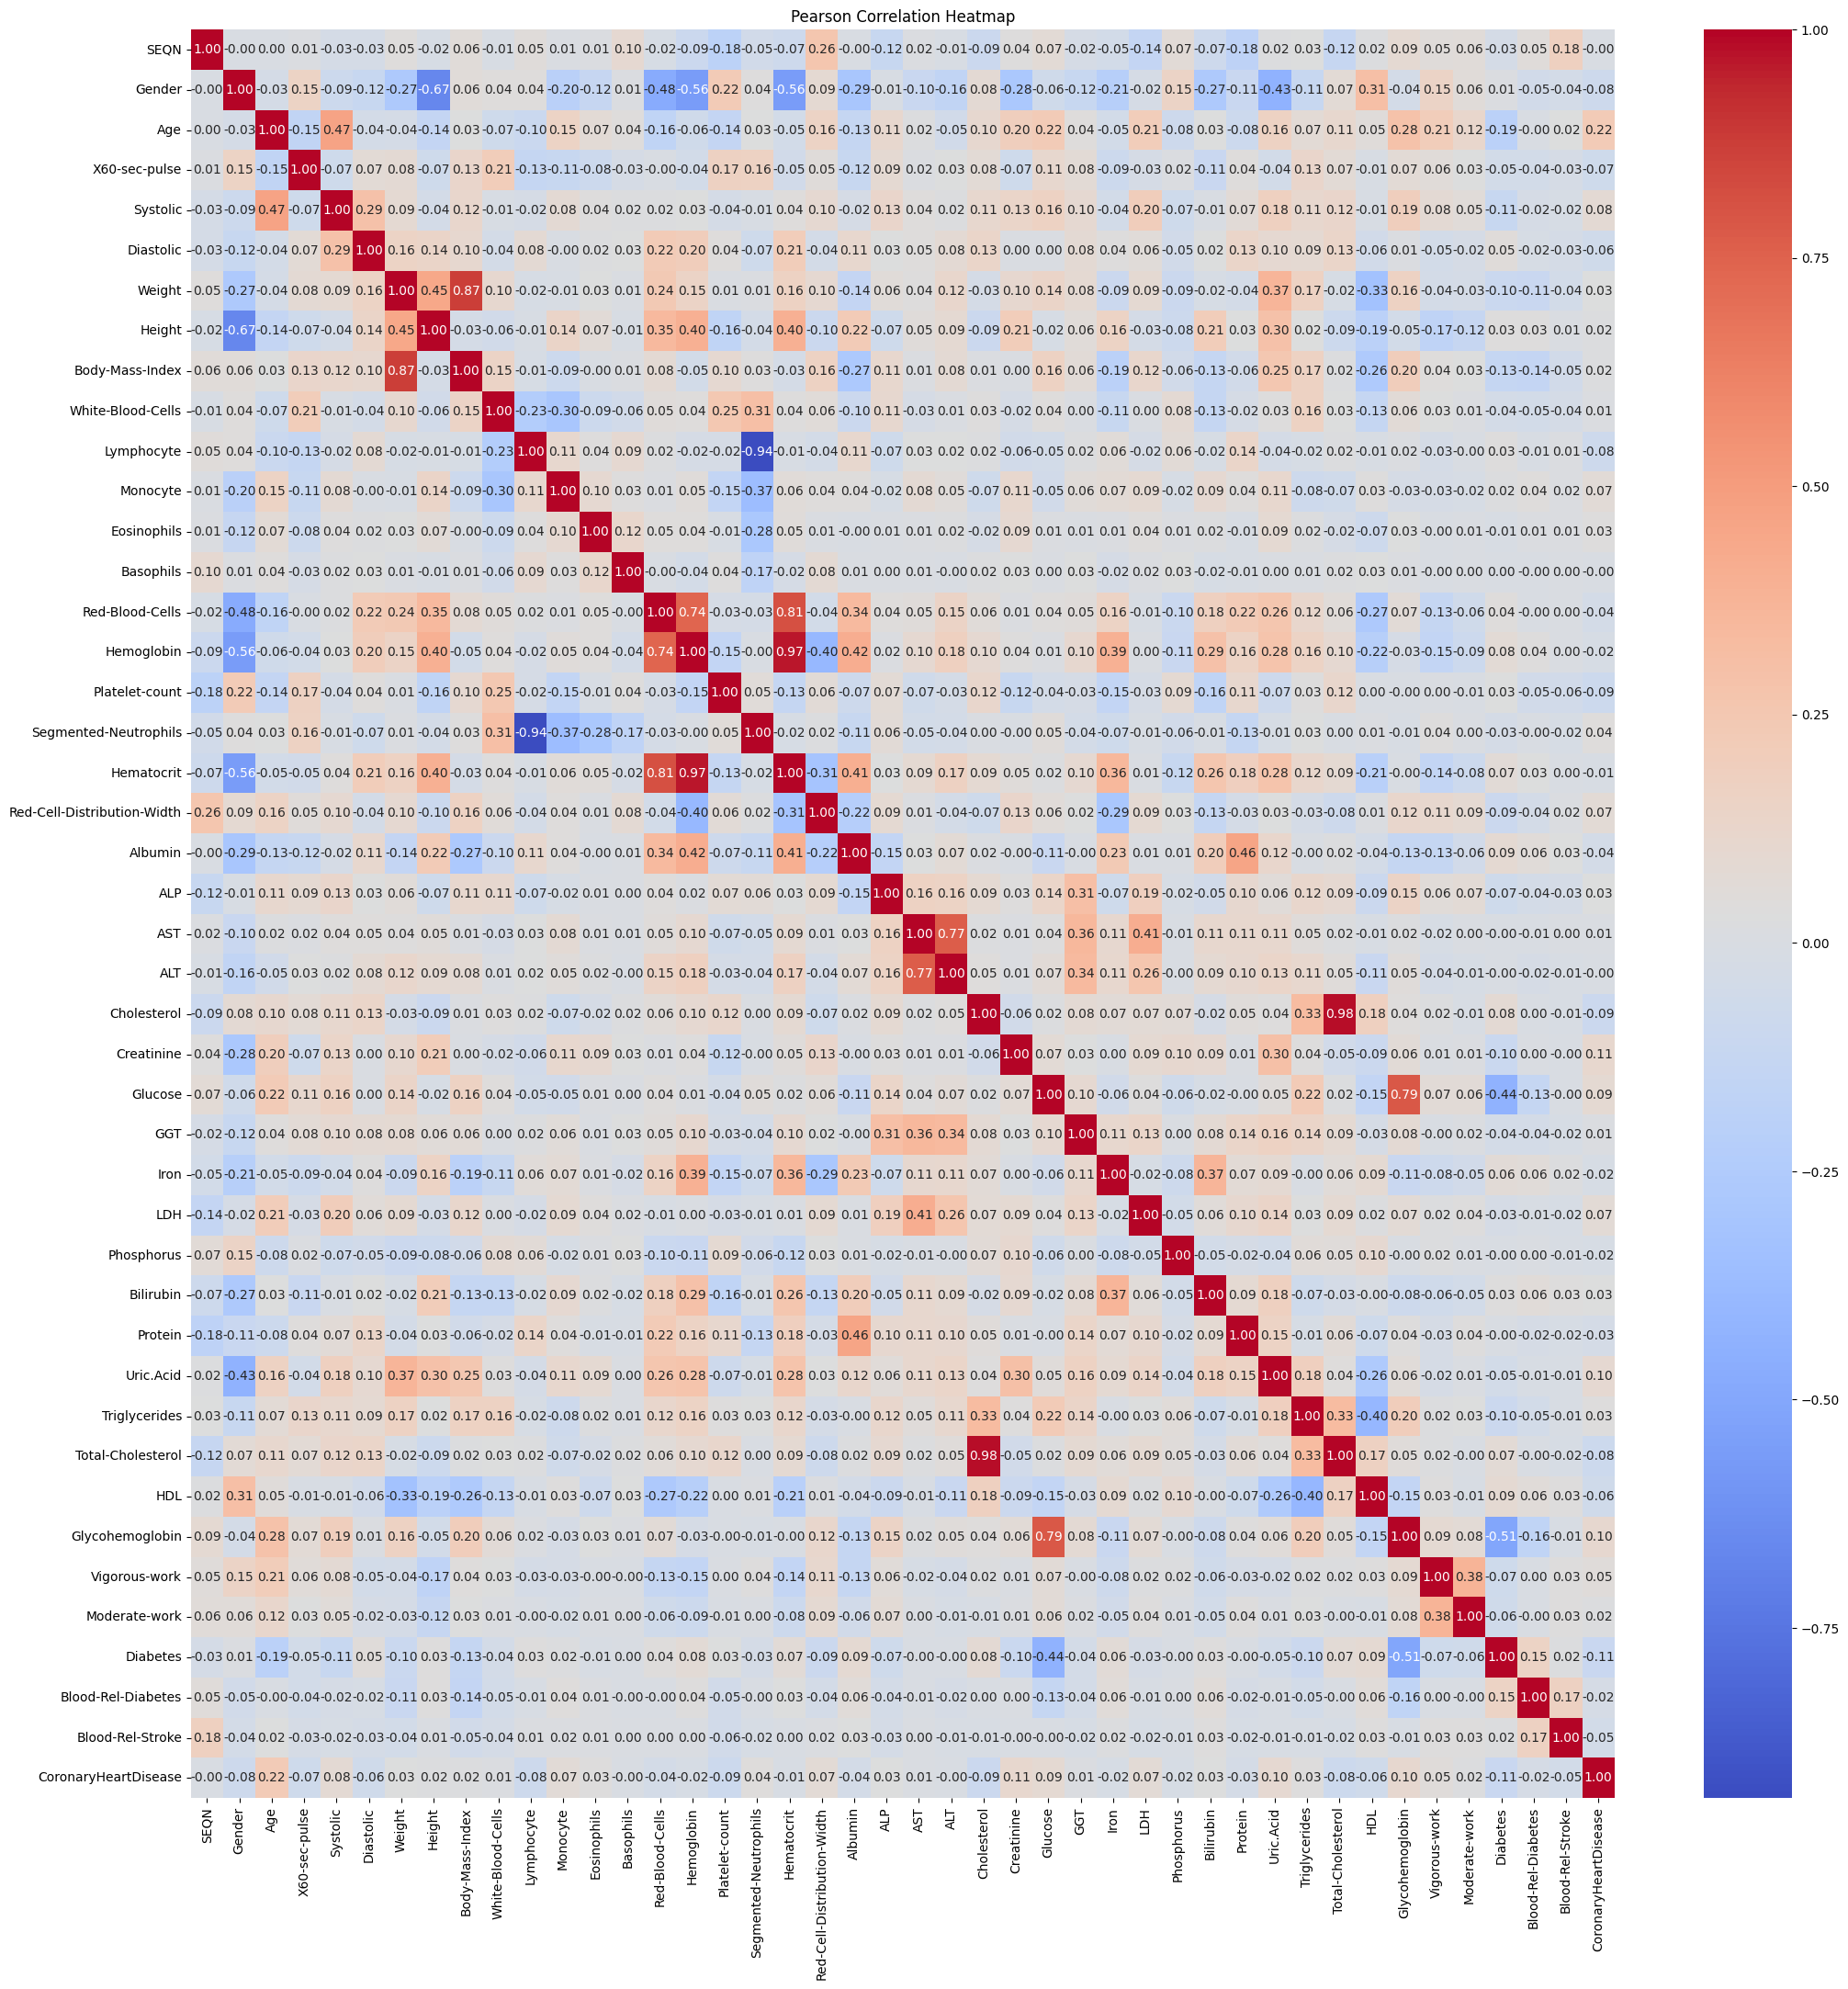

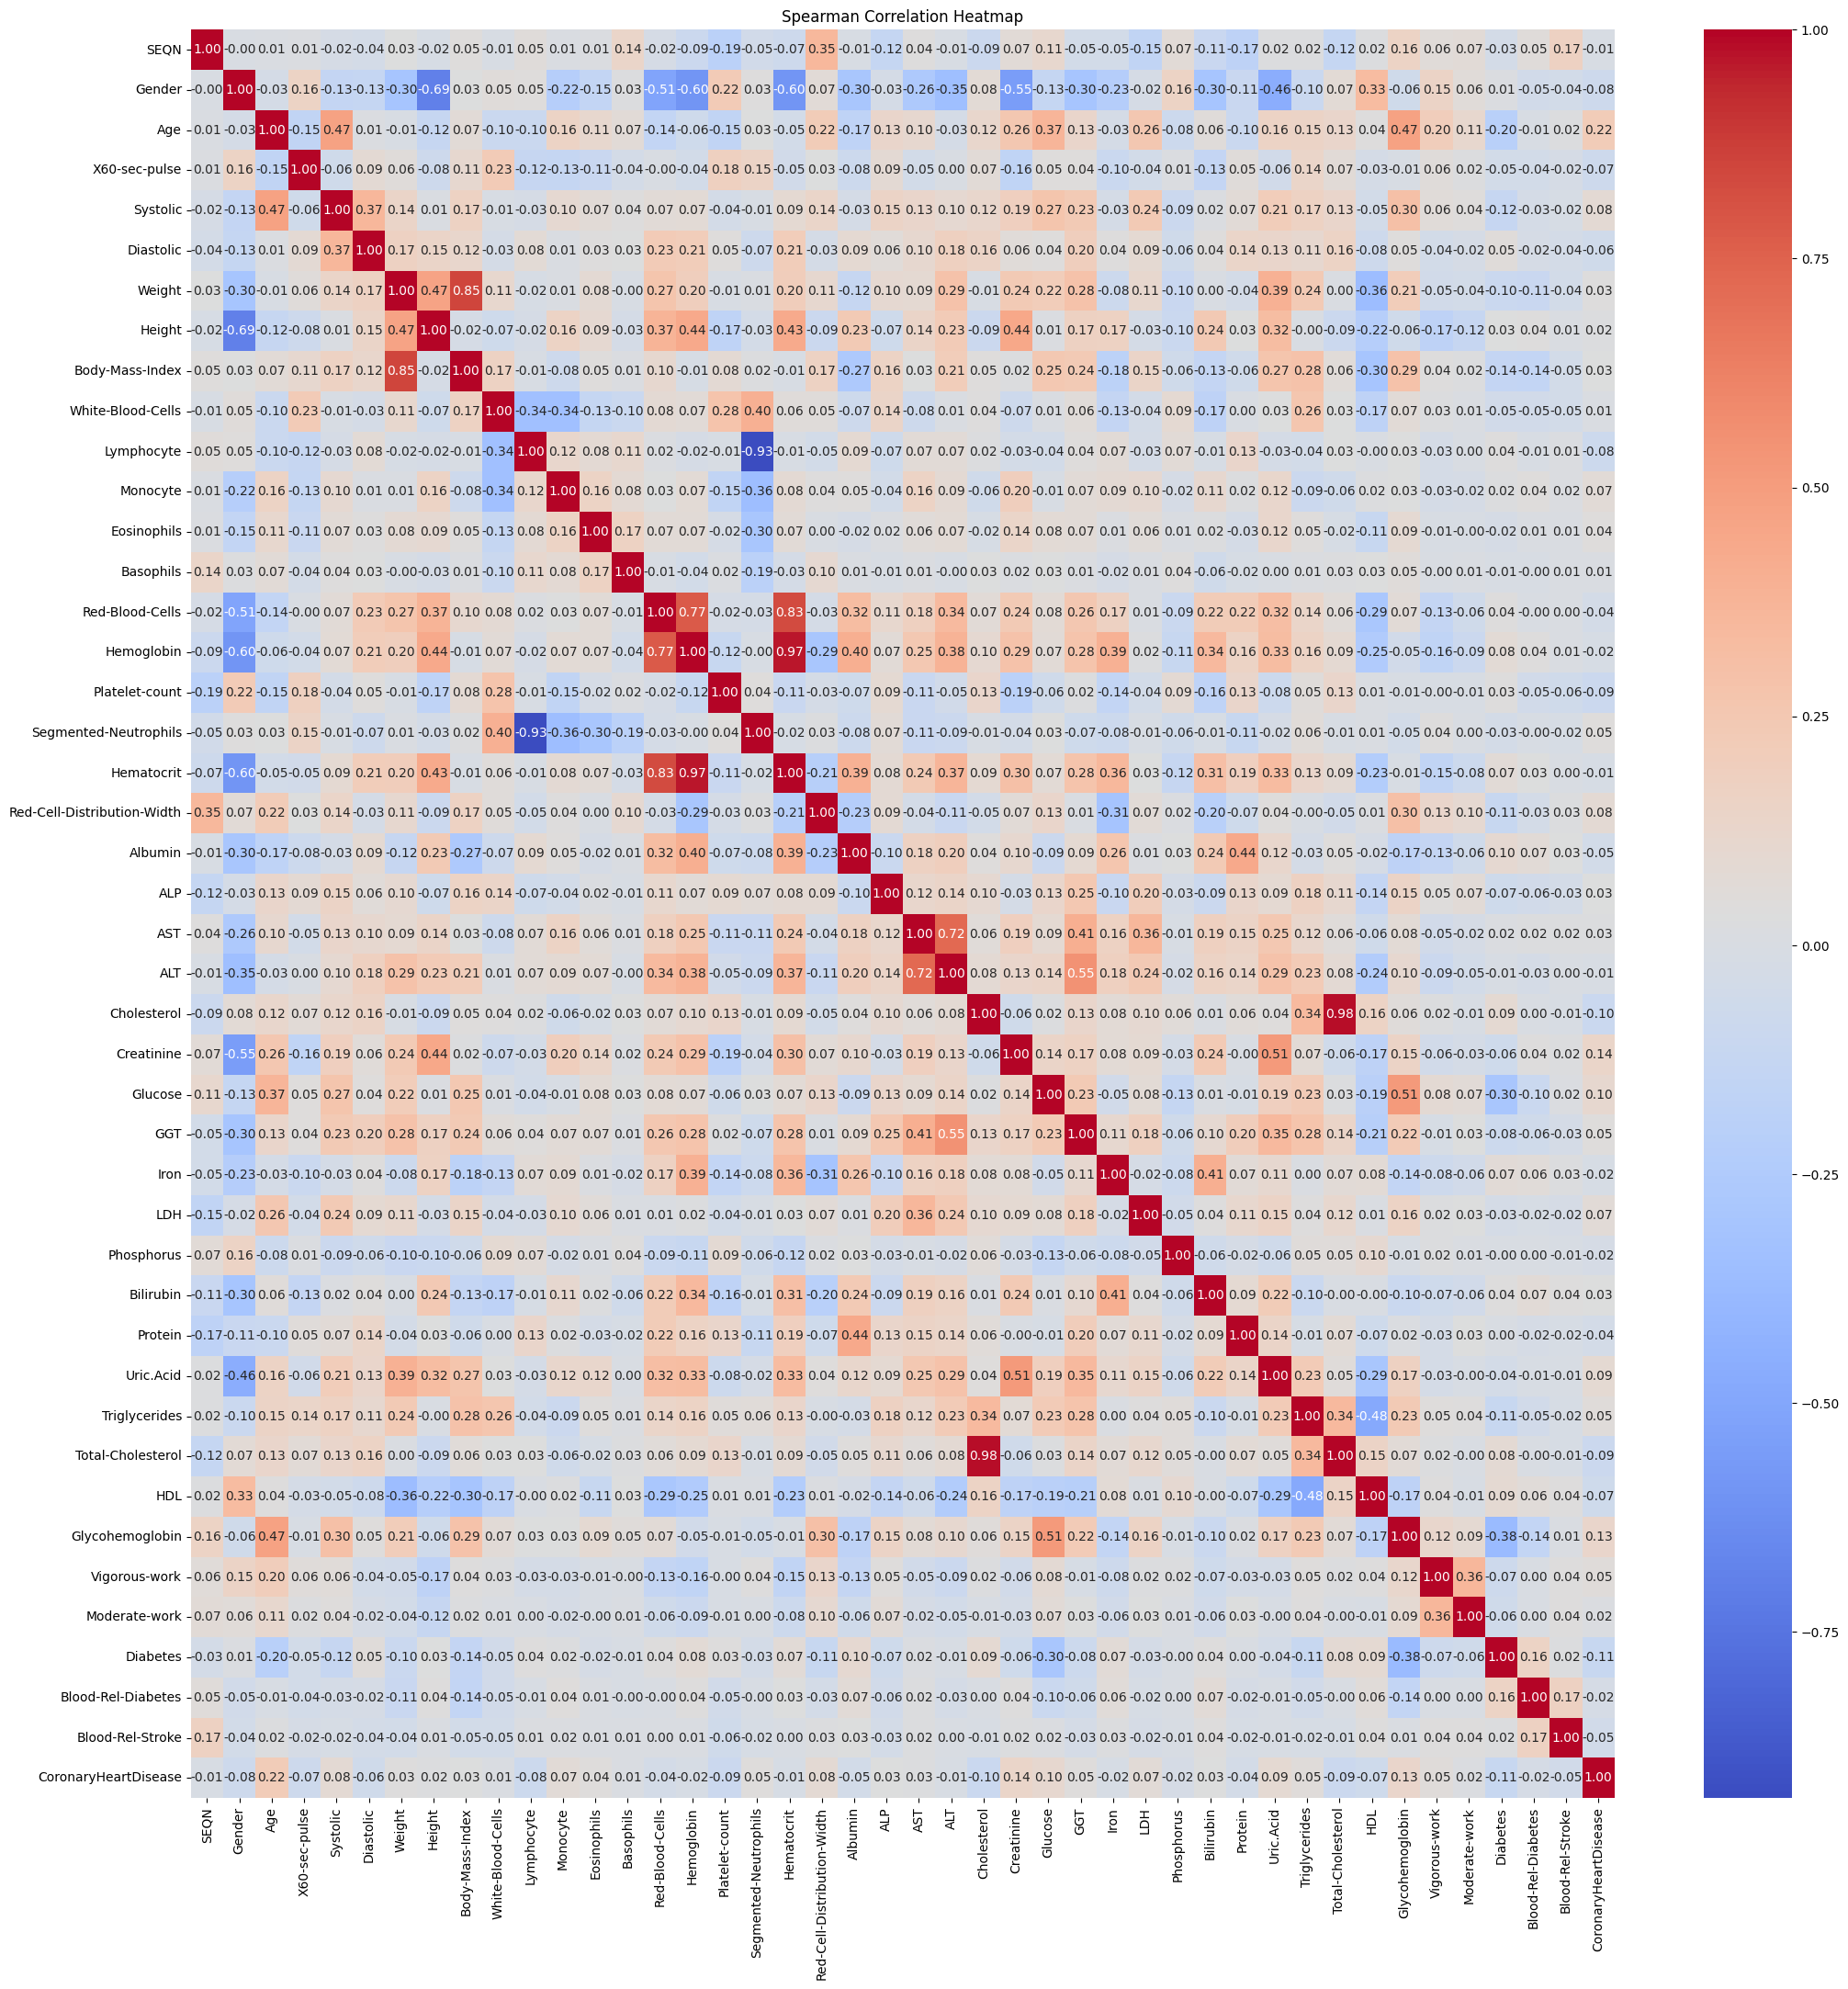

In [13]:

# Plot Pearson correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Plot Spearman correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()